In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%time
df1= pd.read_csv("https://raw.githubusercontent.com/SayamAlt/Fake-Reviews-Detection/main/fake%20reviews%20dataset.csv")


CPU times: user 150 ms, sys: 41.5 ms, total: 191 ms
Wall time: 517 ms


In [ ]:
df1.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df1.shape

(40432, 4)

In [ ]:
df1.label.value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

In [ ]:
df1.isna().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df1.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df1.label = df1.label.map(dict(CG=0, OR=1))

In [ ]:
df1.label.value_counts()

0    20216
1    20216
Name: label, dtype: int64

In [ ]:
import string
import re
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
%%time
def clean_text(txt):
    """""
    cleans the input text in the following steps
    1- replace contractions
    2- removing punctuation
    3- spliting into words
    4- removing stopwords
    5- removing leftover punctuations
    """""
   # contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    #def _get_contractions(contraction_dict):
     #   contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
      #  return contraction_dict, contraction_re

    #def replace_contractions(text):
     #   contractions, contractions_re = _get_contractions(contraction_dict)
      #  def replace(match):
       #     return contractions[match.group(0)]
        #return contractions_re.sub(replace, text)

    # replace contractions and convert to lowercase
    txt = txt.lower()
    #txt = replace_contractions(txt)
    
    #remove punctuations
    #txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', '', txt)
    txt= re.sub(r"([.,!?])", r" \1 ",txt)
    txt = re.sub(r"[^a-zA-Z.,!?]+", r" ", txt)

    
    # split into words
    words = word_tokenize(txt)
    
    # remove stopwords
    #stop_words = set(stopwords.words('english'))
   # words = [w for w in words if not w in stop_words]
    
    # removing leftover punctuations
   # words = [word for word in words if word.isalpha()]

   # lemmatizer = nltk.stem.WordNetLemmatizer()
  #  def lemmatize_text(txt):
  #      return [lemmatizer.lemmatize(w) for w in words]

    cleaned_text = ' '.join(words)
    return cleaned_text
    
df1['text_'] = df1['text_'].apply(lambda txt: clean_text(txt))


CPU times: user 22.6 s, sys: 74.1 ms, total: 22.7 s
Wall time: 22.6 s


In [ ]:
df1['text_'].iloc[0]

'love this ! well made , sturdy , and very comfortable . i love it ! very pretty'

In [ ]:
sentences=df1.text_.values
target=df1.label.values

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
1.2

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


1.2

In [ ]:
!pip install transformers==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 754 kB 5.1 MB/s 
     |████████████████████████████████| 3.0 MB 58.5 MB/s 
     |████████████████████████████████| 1.3 MB 70.2 MB/s 
     |████████████████████████████████| 880 kB 94.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=a6c7116e90568ccb50498609296334475605621206ca8c9ac10ad2ec9cc70aaf
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [ ]:
#Loading pre trained models
from transformers import (
    BertForSequenceClassification,
#     TFBertForSequenceClassification, 
                          BertTokenizer,
#                           TFRobertaForSequenceClassification,
                          RobertaForSequenceClassification,
                          RobertaTokenizer,
                          XLNetForSequenceClassification,
                          XLNetTokenizer,
                         AdamW)
roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", # 12-layer, 768-hidden, 12-heads, 125M parameters RoBERTa using the BERT-base architecture
                                                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                    # You can increase this for multi-class tasks.   
                                                                    output_attentions = False, # Whether the model returns attentions weights.
                                                                    output_hidden_states = False # Whether the model returns all hidden-states.
                                                                )
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model.cuda()



Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [ ]:
#Loading pretrained models
from transformers import (
    BertForSequenceClassification,
#     TFBertForSequenceClassification, 
                          BertTokenizer,
#                           TFRobertaForSequenceClassification,
                          RobertaForSequenceClassification,
                          RobertaTokenizer,
                          XLNetForSequenceClassification,
                          XLNetTokenizer,
                         AdamW)

# BERT
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
                                                                num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                # You can increase this for multi-class tasks.   
                                                                output_attentions = False, # Whether the model returns attentions weights.
                                                                output_hidden_states = False # Whether the model returns all hidden-states.
                                                          )
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# Tell pytorch to run this model on the GPU.
bert_model.cuda()
                                                           

# RoBERTa
roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", # 12-layer, 768-hidden, 12-heads, 125M parameters RoBERTa using the BERT-base architecture
                                                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                    # You can increase this for multi-class tasks.   
                                                                    output_attentions = False, # Whether the model returns attentions weights.
                                                                   output_hidden_states = False # Whether the model returns all hidden-states.
                                                                # config =configuration
                                                                )
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model.cuda()

#XLNET
xlnet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", # 12-layer, 768-hidden, 12-heads, 125M parameters RoBERTa using the BERT-base architecture
                                                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                    # You can increase this for multi-class tasks.   
                                                                    output_attentions = False, # Whether the model returns attentions weights.
                                                                    output_hidden_states = False # Whether the model returns all hidden-states.
                                                                )
xlnet_tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
# Tell pytorch to run this model on the GPU.
xlnet_model.cuda()


print(' Base models loaded')

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/467M [00:00<?, ?B/s]

- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

 Base models loaded


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the text split into tokens.
print('Tokenized RoBERT: ', roberta_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs RoBERTa: ', roberta_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(sentences[0])))

 Original:  love this ! well made , sturdy , and very comfortable . i love it ! very pretty
Tokenized RoBERT:  ['love', 'Ġthis', 'Ġ!', 'Ġwell', 'Ġmade', 'Ġ,', 'Ġsturdy', 'Ġ,', 'Ġand', 'Ġvery', 'Ġcomfortable', 'Ġ.', 'Ġi', 'Ġlove', 'Ġit', 'Ġ!', 'Ġvery', 'Ġpretty']
Token IDs RoBERTa:  [17693, 42, 27785, 157, 156, 2156, 28685, 2156, 8, 182, 3473, 479, 939, 657, 24, 27785, 182, 1256]


In [ ]:
#Tokenization
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the text split into tokens.
print('Tokenized BERT: ', bert_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs BERT: ', bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(sentences[0])))

# Print the text split into tokens.
print('Tokenized RoBERT: ', roberta_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs RoBERTa: ', roberta_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(sentences[0])))


# Print the text split into tokens.
print('Tokenized XLNET: ', xlnet_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs XLNET: ', xlnet_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(sentences[0])))

 Original:  love this ! well made , sturdy , and very comfortable . i love it ! very pretty
Tokenized BERT:  ['love', 'this', '!', 'well', 'made', ',', 'sturdy', ',', 'and', 'very', 'comfortable', '.', 'i', 'love', 'it', '!', 'very', 'pretty']
Token IDs BERT:  [2293, 2023, 999, 2092, 2081, 1010, 23073, 1010, 1998, 2200, 6625, 1012, 1045, 2293, 2009, 999, 2200, 3492]
Tokenized RoBERT:  ['love', 'Ġthis', 'Ġ!', 'Ġwell', 'Ġmade', 'Ġ,', 'Ġsturdy', 'Ġ,', 'Ġand', 'Ġvery', 'Ġcomfortable', 'Ġ.', 'Ġi', 'Ġlove', 'Ġit', 'Ġ!', 'Ġvery', 'Ġpretty']
Token IDs RoBERTa:  [17693, 42, 27785, 157, 156, 2156, 28685, 2156, 8, 182, 3473, 479, 939, 657, 24, 27785, 182, 1256]
Tokenized XLNET:  ['▁love', '▁this', '▁', '!', '▁well', '▁made', '▁', ',', '▁sturdy', '▁', ',', '▁and', '▁very', '▁comfortable', '▁', '.', '▁', 'i', '▁love', '▁it', '▁', '!', '▁very', '▁pretty']
Token IDs XLNET:  [15479, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
sequence = """Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️"""

bert_tokenized_sequence = bert_tokenizer.tokenize(sequence)
roberta_tokenized_sequence = roberta_tokenizer.tokenize(sequence)
xlnet_tokenized_sequence=xlnet_tokenizer.tokenize(sequence)

print("""Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️""")
print("BERT:", bert_tokenized_sequence)
print("RoBERTa:", roberta_tokenized_sequence)
print("XLNET:",xlnet_tokenized_sequence)

Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️
BERT: ['will', 'your', 'hometown', 'be', 'taking', 'in', 'obama', '’', 's', 'refugees', '?', 'here', '’', 's', 'the', 'list', 'of', 'cities', 'where', 'they', '’', 're', 'being', 'transplant', '##ed', '[UNK]']
RoBERTa: ['Will', 'ĠYour', 'ĠH', 'ometown', 'ĠBe', 'ĠTaking', 'ĠIn', 'ĠObama', 'âĢ', 'Ļ', 's', 'ĠRefugees', '?', 'ĠHere', 'âĢ', 'Ļ', 's', 'ĠThe', 'ĠList', 'ĠOf', 'ĠCities', 'ĠWhere', 'ĠThey', 'âĢ', 'Ļ', 're', 'ĠBeing', 'ĠTrans', 'pl', 'anted', 'ĠðŁ', 'ı', 'Ļ', 'ï¸ı']
XLNET: ['▁Will', '▁Your', '▁Home', 'town', '▁Be', '▁Taking', '▁In', '▁Obama', '’', 's', '▁Refugees', '?', '▁Here', '’', 's', '▁The', '▁List', '▁Of', '▁Cities', '▁Where', '▁They', '’', 're', '▁Being', '▁Trans', 'plant', 'ed', '▁', '🏙️']


In [ ]:
token_lens1 = []

for txt in df1.text_:
    tokens = bert_tokenizer.encode(txt,truncation=True, max_length=512)
    token_lens1.append(len(tokens))

In [ ]:
token_lens = []

for txt in sentences:
    tokens = roberta_tokenizer.encode(txt,truncation=True, max_length=512)
    token_lens.append(len(tokens))

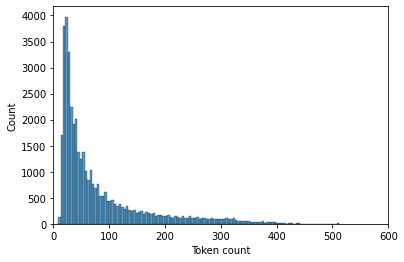

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(token_lens1)
plt.xlim([0, 600]);
plt.xlabel('Token count');

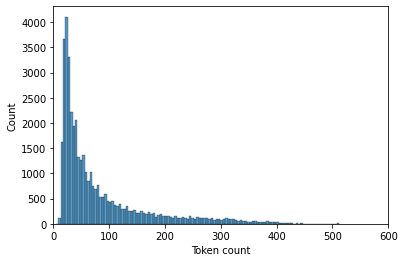

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(token_lens)
plt.xlim([0, 600]);
plt.xlabel('Token count');

In [ ]:
max_len_bert = 0
max_len_roberta = 0
max_len_xlnet=0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids_bert = bert_tokenizer.encode(sent, add_special_tokens=True)
    input_ids_roberta = roberta_tokenizer.encode(sent, add_special_tokens=True)
    input_ids_xlnet=xlnet_tokenizer.encode(sent,add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_bert = max(max_len_bert, len(input_ids_bert))
    max_len_roberta = max(max_len_roberta, len(input_ids_roberta))
    max_len_xlnet = max(max_len_xlnet, len(input_ids_xlnet))

    
print('Max sentence length BERT: ', max_len_bert)
print('Max sentence length RoBERTa: ', max_len_roberta)
print('Max sentence length RoBERTa: ', max_len_xlnet)

Max sentence length BERT:  640
Max sentence length RoBERTa:  638
Max sentence length RoBERTa:  800


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
bert_input_ids = []
bert_attention_masks = []
roberta_input_ids = []
roberta_attention_masks = []
xlnet_input_ids =[]
xlnet_attention_masks=[]
sentence_ids = []
counter = 0

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    bert_encoded_dict = bert_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',
                        truncation =True     # Return pytorch tensors.
                   )
    
    
    roberta_encoded_dict = roberta_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt', 
                        truncation = True    # Return pytorch tensors.
                   )
    xlnet_encoded_dict = xlnet_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt', 
                        truncation = True    # Return pytorch tensors.
                   )
    # Add the encoded sentence to the list.    
    bert_input_ids.append(bert_encoded_dict['input_ids'])
    roberta_input_ids.append(roberta_encoded_dict['input_ids'])
    xlnet_input_ids.append(xlnet_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    bert_attention_masks.append(bert_encoded_dict['attention_mask'])
    roberta_attention_masks.append(roberta_encoded_dict['attention_mask'])
    xlnet_attention_masks.append(xlnet_encoded_dict['attention_mask'])
    
    # collecting sentence_ids
    sentence_ids.append(counter)
    counter  = counter + 1
    
    
    
# Convert the lists into tensors.
bert_input_ids = torch.cat(bert_input_ids, dim=0)
bert_attention_masks = torch.cat(bert_attention_masks, dim=0)

roberta_input_ids = torch.cat(roberta_input_ids, dim=0)
roberta_attention_masks = torch.cat(roberta_attention_masks, dim=0)

xlnet_input_ids = torch.cat(xlnet_input_ids, dim=0)
xlnet_attention_masks = torch.cat(xlnet_attention_masks, dim=0)

labels = torch.tensor(target)
sentence_ids = torch.tensor(sentence_ids)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[1])
print('Token IDs BERT:', bert_input_ids[1])
print('Token IDs RoBERTa:', roberta_input_ids[1])
print('Token IDs XLNET:', xlnet_input_ids[1])

Original:  love it , a great upgrade from the original . i ve had mine for a couple of years
Token IDs BERT: tensor([  101,  2293,  2009,  1010,  1037,  2307, 12200,  2013,  1996,  2434,
         1012,  1045,  2310,  2018,  3067,  2005,  1037,  3232,  1997,  2086,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     

In [ ]:
from torch.utils.data import TensorDataset, random_split
# function to seed the script globally
torch.manual_seed(1)

# Combine the training inputs into a TensorDataset.
bert_dataset = TensorDataset(sentence_ids, bert_input_ids, bert_attention_masks, labels)
roberta_dataset = TensorDataset(roberta_input_ids, roberta_attention_masks, labels)
xlnet_dataset = TensorDataset(xlnet_input_ids, xlnet_attention_masks, labels)

In [ ]:
# function to remove sentice ids from the tensor dataset post train test split
def index_remover(tensordata):
    input_ids = []
    attention_masks = []
    labels = []
   
    for a,b,c,d in tensordata:
        input_ids.append(b.tolist())
        attention_masks.append(c.tolist())
        labels.append(d.tolist())
        
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    labels = torch.tensor(labels)
    
    final_dataset =  TensorDataset(input_ids, attention_masks, labels)
    return final_dataset
        
# check
trial_dataset =  index_remover(bert_dataset)
trial_dataset[0]
# yes we were able to remove the sentence id from the data without disturbing the data format
#assigning sentences and labels to separate variables
sentences = df1["text_"].values
labels = df1["label"].values

In [ ]:
# Create a 80-20 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(bert_dataset))
val_size = len(bert_dataset) - train_size

# Divide the dataset by randomly selecting samples.
bert_train_dataset, bert_val_dataset = random_split(bert_dataset, [train_size, val_size])
roberta_train_dataset, roberta_val_dataset = random_split(roberta_dataset, [train_size, val_size])
xlnet_train_dataset,xlnet_val_dataset =random_split(xlnet_dataset, [train_size, val_size])

# Checking whether the distribution of target is consitent across both the sets
sentence_ids_list_valid = []
for a,b,c,d in bert_val_dataset:
  sentence_ids_list_valid.append(a.tolist())

# removing sentence ids from tensor dataset so that it can be used for training 
bert_train_dataset = index_remover(bert_train_dataset)
bert_val_dataset = index_remover(bert_val_dataset)


# Checking whether the distribution of target is consitent across both the sets
label_temp_list = []
for a,b,c in bert_train_dataset:
  label_temp_list.append(c)

print('{:>5,} training samples'.format(train_size))
print('{:>5,} training samples with reviews'.format(sum(label_temp_list)))


label_temp_list = []
for a,b,c in bert_val_dataset:
  label_temp_list.append(c)

print('{:>5,} validation samples'.format(val_size))
print('{:>5,} validation samples with reviews'.format(sum(label_temp_list)))

32,345 training samples
16,168 training samples with reviews
8,087 validation samples
4,048 validation samples with reviews


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32
gradients_accumulation =10

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
bert_train_dataloader = DataLoader(
            bert_train_dataset,  # The training samples.
            sampler = RandomSampler(bert_train_dataset), # Select batches randomly
            batch_size = batch_size, # Trains with this batch size.
            num_workers=3
        )
roberta_train_dataloader = DataLoader(
            roberta_train_dataset,  # The training samples.
            sampler = RandomSampler(roberta_train_dataset), # Select batches randomly
            batch_size = batch_size, # Trains with this batch size.
            num_workers =3
        )
xlnet_train_dataloader = DataLoader(
            xlnet_train_dataset,  # The training samples.
            sampler = RandomSampler(xlnet_train_dataset), # Select batches randomly
            batch_size = 15, # Trains with this batch size.
            num_workers =3
        )
# For validation the order doesn't matter, so we'll just read them sequentially.
bert_validation_dataloader = DataLoader(
            bert_val_dataset, # The validation samples.
            sampler = SequentialSampler(bert_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            num_workers =3
)
roberta_validation_dataloader = DataLoader(
            roberta_val_dataset, # The validation samples.
            sampler = SequentialSampler(roberta_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            num_workers =3
        )
xlnet_validation_dataloader = DataLoader(
            xlnet_val_dataset, # The validation samples.
            sampler = SequentialSampler(xlnet_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            num_workers =3
        )           

In [ ]:

# Get all of the model's parameters as a list of tuples.
params = list(roberta_model.named_parameters())

print('The Roberta model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The Roberta model has 203 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (50265, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias         

In [ ]:
# Get all of the xlnet_model's parameters as a list of tuples.
params = list(xlnet_model.named_parameters())

print('The XLNET model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The XLNET model has 210 different named parameters.

==== Embedding Layer ====

transformer.mask_emb                                     (1, 1, 768)
transformer.word_embedding.weight                       (32000, 768)
transformer.layer.0.rel_attn.q                          (768, 12, 64)
transformer.layer.0.rel_attn.k                          (768, 12, 64)
transformer.layer.0.rel_attn.v                          (768, 12, 64)

==== First Transformer ====

transformer.layer.0.rel_attn.o                          (768, 12, 64)
transformer.layer.0.rel_attn.r                          (768, 12, 64)
transformer.layer.0.rel_attn.r_r_bias                       (12, 64)
transformer.layer.0.rel_attn.r_s_bias                       (12, 64)
transformer.layer.0.rel_attn.r_w_bias                       (12, 64)
transformer.layer.0.rel_attn.seg_embed                   (2, 12, 64)
transformer.layer.0.rel_attn.layer_norm.weight                (768,)
transformer.layer.0.rel_attn.layer_norm.bias             

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
#bert_optimizer = torch.optim.AdamW(bert_model.parameters(),
 #                 lr = 5e-5, # args.learning_rate - default is 5e-5
  #                eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
   #             )
param_optimizer = list(bert_model.named_parameters())
no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
optimizer_parameters = [{'params': [p for n, p in param_optimizer 
                                    if not any(nd in n for nd in no_decay)],'weight_decay':0.001},
                        {'params': [p for n, p in param_optimizer 
                                    if any(nd in n for nd in no_decay)],'weight_decay':0.0}]

print('Preparing the optimizer...')
#optimizer 
bert_optimizer = AdamW(optimizer_parameters, lr=5e-5)

print('Preparing the optimizer...')

roberta_optimizer = torch.optim.AdamW(roberta_model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

xlnet_optimizer = torch.optim.AdamW(xlnet_model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

Preparing the optimizer...
Preparing the optimizer...


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 2,I have already seen that the model starts overfitting beyound 2 epochs
epochs = 5

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(bert_train_dataloader) * epochs

# Create the learning rate scheduler.
bert_scheduler = get_linear_schedule_with_warmup(bert_optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

roberta_scheduler = get_linear_schedule_with_warmup(roberta_optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
xlnet_scheduler = get_linear_schedule_with_warmup(xlnet_optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from torch.cuda.amp import GradScaler, autocast

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets.float())

In [ ]:
#BERT 
from torch.nn.modules.loss import CrossEntropyLoss
import random
from sklearn.metrics import f1_score,precision_score,recall_score,classification_report,confusion_matrix

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
bert_training_stats = []
y_pred_list = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the bert_model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-bert_model-train-do-in-pytorch)
    bert_model.train()

    # For each batch of training data...
    for step, batch in enumerate(bert_train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(bert_train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        bert_model.zero_grad()        

        # Perform a forward pass (evaluate the bert_model on this training batch).
        # The documentation for this `bert_model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/bert_model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # are given and what flags are set. For our usage here, it returns
        # the loss (because we provided labels) and the "logits"--the bert_model
        # outputs prior to activation.
        loss, logits = bert_model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        
       # criterion = torch.nn.CrossEntropyLoss(weight=weight,reduction='mean')
        b_labels1=torch.nn.functional.one_hot(b_labels, num_classes=2)
        
        loss1 = loss_fn(logits,b_labels1)
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss1.item()

        # Perform a backward pass to calculate the gradients.
        loss1.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The bert_optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        bert_optimizer.step()

        # Update the learning rate.
        bert_scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(bert_train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the bert_model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    bert_model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_f1_score =0
    predlist =[]
    lbllist =[]
    total_logits=[]
    # Evaluate data for one epoch
    for batch in bert_validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # Get the "logits" output by the bert_model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = bert_model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            #Converting the labels to one hot to sync with same shape as logits
            b_labels1=torch.nn.functional.one_hot(b_labels, num_classes=2)


           # weight=torch.FloatTensor([0.5,0.5]).to(device)
            criterion = torch.nn.CrossEntropyLoss()
        #using bcewithlogitloss that has inbuilt sigmoid function with logits
            loss1 = loss_fn(logits, b_labels1)
            loss1 = loss1 / gradients_accumulation
                 
           # y_pred_list.append(y_pred.cpu().numpy())
       
        #y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
       # print('y_pred_list:',y_pred_list)   
        # Accumulate the validation loss.
        total_eval_loss += loss1.item()

    #Converting for predictions by applying sigmoid to logits
        pred_logits_sigmoid=torch.sigmoid(logits)
        y_pred=torch.round(pred_logits_sigmoid)

        # Move logits and labels to CPU
        logits_pred = y_pred.detach().cpu().numpy()
        label_ids1 = b_labels.to('cpu').numpy()
        logits=logits.detach().cpu().numpy()
        #For confusion matrix and classification report to work we need same dimensions.
        label_ids = b_labels1.to('cpu').numpy()
        pred_logits_sigmoid=pred_logits_sigmoid.detach().cpu().numpy()

        #print("loss1:",loss1)

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids1)

        #print(predictions)
        predictions=np.argmax(logits_pred, axis=1)
        y_test=np.argmax(label_ids,axis=1)
        predlist.extend(predictions)
        lbllist.extend(y_test)
        total_f1_score += f1_score(predlist,lbllist, average = 'micro')  

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(bert_validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    #f1 score

    avg_f1_score =total_f1_score/len(bert_validation_dataloader)
    print("  F1 score: {0:.2f}".format(avg_f1_score))

    #classification report
    print(classification_report(lbllist, predlist))  

    #confusion matrix
    cm = confusion_matrix(lbllist,predlist)
    # constant for classes
    print(cm)       
   
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(bert_validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    
    # Record all statistics from this epoch.
    bert_training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 5 ========
Training...
  Batch    40  of  1,011.    Elapsed: 0:00:53.
  Batch    80  of  1,011.    Elapsed: 0:01:47.
  Batch   120  of  1,011.    Elapsed: 0:02:40.
  Batch   160  of  1,011.    Elapsed: 0:03:33.
  Batch   200  of  1,011.    Elapsed: 0:04:27.
  Batch   240  of  1,011.    Elapsed: 0:05:20.
  Batch   280  of  1,011.    Elapsed: 0:06:13.
  Batch   320  of  1,011.    Elapsed: 0:07:06.
  Batch   360  of  1,011.    Elapsed: 0:08:00.
  Batch   400  of  1,011.    Elapsed: 0:08:53.
  Batch   440  of  1,011.    Elapsed: 0:09:46.
  Batch   480  of  1,011.    Elapsed: 0:10:40.
  Batch   520  of  1,011.    Elapsed: 0:11:33.
  Batch   560  of  1,011.    Elapsed: 0:12:26.
  Batch   600  of  1,011.    Elapsed: 0:13:20.
  Batch   640  of  1,011.    Elapsed: 0:14:13.
  Batch   680  of  1,011.    Elapsed: 0:15:06.
  Batch   720  of  1,011.    Elapsed: 0:15:59.
  Batch   760  of  1,011.    Elapsed: 0:16:53.
  Batch   800  of  1,011.    Elapsed: 0:17:46.
  Batch   840  of

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=bert_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.21e-01,1.14e-02,0.96,0:22:27,0:02:08
2,3.36e-02,9.95e-03,0.97,0:22:26,0:02:07
3,1.11e-02,1.69e-02,0.96,0:22:25,0:02:07
4,3.35e-03,1.65e-02,0.97,0:22:25,0:02:07
5,1.47e-03,2.01e-02,0.97,0:22:24,0:02:07


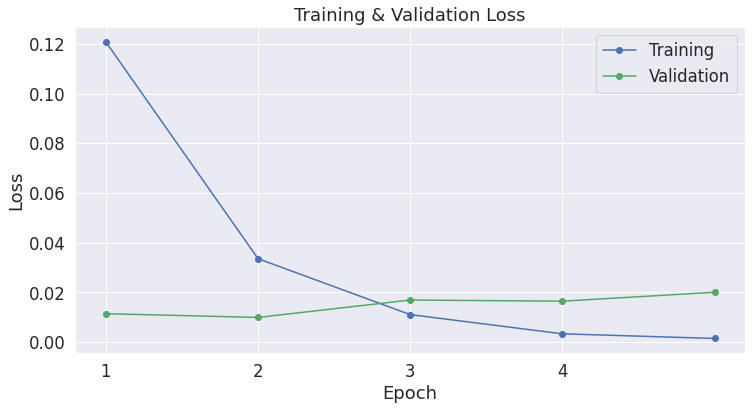

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
'''
del bert_model
del bert_optimizer
torch.cuda.empty_cache()
'''

'\ndel bert_model\ndel bert_optimizer\ntorch.cuda.empty_cache()\n'


======== Epoch 1 / 5 ========
Training...
  Batch    40  of  1,011.    Elapsed: 0:00:17.
  Batch    80  of  1,011.    Elapsed: 0:00:34.
  Batch   120  of  1,011.    Elapsed: 0:00:51.
  Batch   160  of  1,011.    Elapsed: 0:01:08.
  Batch   200  of  1,011.    Elapsed: 0:01:25.
  Batch   240  of  1,011.    Elapsed: 0:01:41.
  Batch   280  of  1,011.    Elapsed: 0:01:58.
  Batch   320  of  1,011.    Elapsed: 0:02:15.
  Batch   360  of  1,011.    Elapsed: 0:02:32.
  Batch   400  of  1,011.    Elapsed: 0:02:49.
  Batch   440  of  1,011.    Elapsed: 0:03:06.
  Batch   480  of  1,011.    Elapsed: 0:03:22.
  Batch   520  of  1,011.    Elapsed: 0:03:39.
  Batch   560  of  1,011.    Elapsed: 0:03:56.
  Batch   600  of  1,011.    Elapsed: 0:04:13.
  Batch   640  of  1,011.    Elapsed: 0:04:30.
  Batch   680  of  1,011.    Elapsed: 0:04:47.
  Batch   720  of  1,011.    Elapsed: 0:05:03.
  Batch   760  of  1,011.    Elapsed: 0:05:20.
  Batch   800  of  1,011.    Elapsed: 0:05:37.
  Batch   840  of

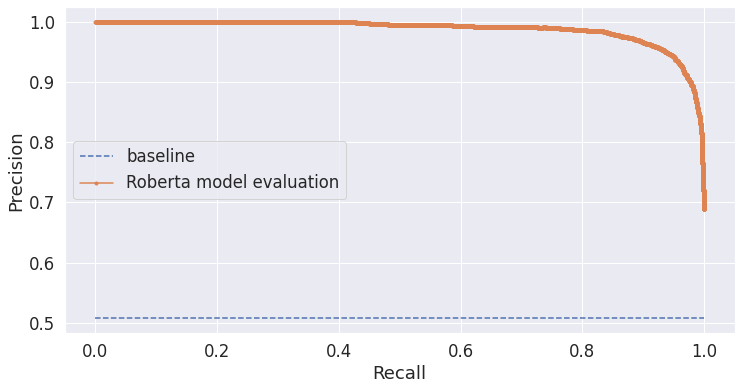

  Validation Loss: 0.15
  Validation took: 0:01:56

======== Epoch 2 / 5 ========
Training...
  Batch    40  of  1,011.    Elapsed: 0:00:17.
  Batch    80  of  1,011.    Elapsed: 0:00:34.
  Batch   120  of  1,011.    Elapsed: 0:00:50.
  Batch   160  of  1,011.    Elapsed: 0:01:07.
  Batch   200  of  1,011.    Elapsed: 0:01:24.
  Batch   240  of  1,011.    Elapsed: 0:01:41.
  Batch   280  of  1,011.    Elapsed: 0:01:58.
  Batch   320  of  1,011.    Elapsed: 0:02:15.
  Batch   360  of  1,011.    Elapsed: 0:02:31.
  Batch   400  of  1,011.    Elapsed: 0:02:48.
  Batch   440  of  1,011.    Elapsed: 0:03:05.
  Batch   480  of  1,011.    Elapsed: 0:03:22.
  Batch   520  of  1,011.    Elapsed: 0:03:39.
  Batch   560  of  1,011.    Elapsed: 0:03:55.
  Batch   600  of  1,011.    Elapsed: 0:04:12.
  Batch   640  of  1,011.    Elapsed: 0:04:29.
  Batch   680  of  1,011.    Elapsed: 0:04:46.
  Batch   720  of  1,011.    Elapsed: 0:05:03.
  Batch   760  of  1,011.    Elapsed: 0:05:20.
  Batch   800

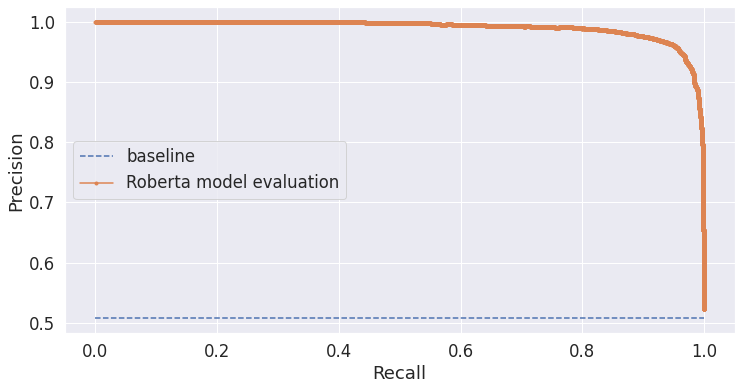

  Validation Loss: 0.24
  Validation took: 0:01:56

======== Epoch 3 / 5 ========
Training...
  Batch    40  of  1,011.    Elapsed: 0:00:17.
  Batch    80  of  1,011.    Elapsed: 0:00:34.
  Batch   120  of  1,011.    Elapsed: 0:00:50.
  Batch   160  of  1,011.    Elapsed: 0:01:07.
  Batch   200  of  1,011.    Elapsed: 0:01:24.
  Batch   240  of  1,011.    Elapsed: 0:01:41.
  Batch   280  of  1,011.    Elapsed: 0:01:58.
  Batch   320  of  1,011.    Elapsed: 0:02:14.
  Batch   360  of  1,011.    Elapsed: 0:02:31.
  Batch   400  of  1,011.    Elapsed: 0:02:48.
  Batch   440  of  1,011.    Elapsed: 0:03:05.
  Batch   480  of  1,011.    Elapsed: 0:03:22.
  Batch   520  of  1,011.    Elapsed: 0:03:39.
  Batch   560  of  1,011.    Elapsed: 0:03:55.
  Batch   600  of  1,011.    Elapsed: 0:04:12.
  Batch   640  of  1,011.    Elapsed: 0:04:29.
  Batch   680  of  1,011.    Elapsed: 0:04:46.
  Batch   720  of  1,011.    Elapsed: 0:05:03.
  Batch   760  of  1,011.    Elapsed: 0:05:19.
  Batch   800

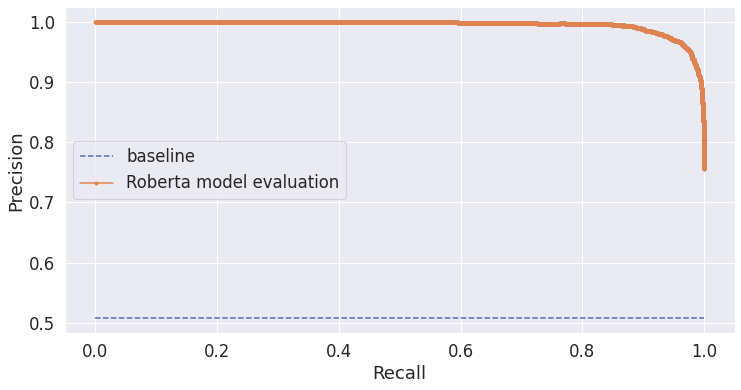

  Validation Loss: 0.10
  Validation took: 0:01:56

======== Epoch 4 / 5 ========
Training...
  Batch    40  of  1,011.    Elapsed: 0:00:17.
  Batch    80  of  1,011.    Elapsed: 0:00:34.
  Batch   120  of  1,011.    Elapsed: 0:00:50.
  Batch   160  of  1,011.    Elapsed: 0:01:07.
  Batch   200  of  1,011.    Elapsed: 0:01:24.
  Batch   240  of  1,011.    Elapsed: 0:01:41.
  Batch   280  of  1,011.    Elapsed: 0:01:58.
  Batch   320  of  1,011.    Elapsed: 0:02:14.
  Batch   360  of  1,011.    Elapsed: 0:02:31.
  Batch   400  of  1,011.    Elapsed: 0:02:48.
  Batch   440  of  1,011.    Elapsed: 0:03:05.
  Batch   480  of  1,011.    Elapsed: 0:03:22.
  Batch   520  of  1,011.    Elapsed: 0:03:38.
  Batch   560  of  1,011.    Elapsed: 0:03:55.
  Batch   600  of  1,011.    Elapsed: 0:04:12.
  Batch   640  of  1,011.    Elapsed: 0:04:29.
  Batch   680  of  1,011.    Elapsed: 0:04:46.
  Batch   720  of  1,011.    Elapsed: 0:05:02.
  Batch   760  of  1,011.    Elapsed: 0:05:19.
  Batch   800

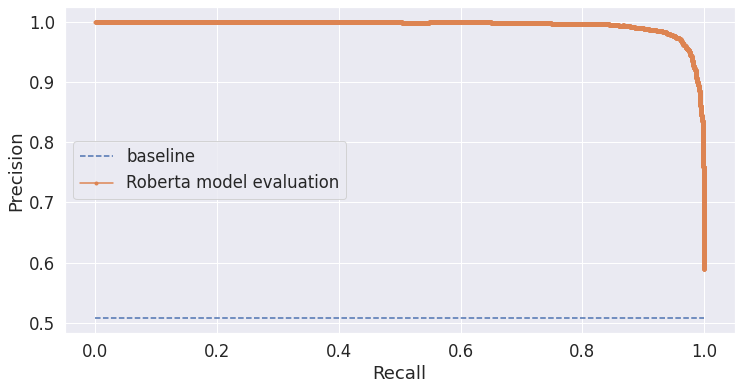

  Validation Loss: 0.16
  Validation took: 0:01:56

======== Epoch 5 / 5 ========
Training...
  Batch    40  of  1,011.    Elapsed: 0:00:17.
  Batch    80  of  1,011.    Elapsed: 0:00:34.
  Batch   120  of  1,011.    Elapsed: 0:00:51.
  Batch   160  of  1,011.    Elapsed: 0:01:07.
  Batch   200  of  1,011.    Elapsed: 0:01:24.
  Batch   240  of  1,011.    Elapsed: 0:01:41.
  Batch   280  of  1,011.    Elapsed: 0:01:58.
  Batch   320  of  1,011.    Elapsed: 0:02:15.
  Batch   360  of  1,011.    Elapsed: 0:02:31.
  Batch   400  of  1,011.    Elapsed: 0:02:48.
  Batch   440  of  1,011.    Elapsed: 0:03:05.
  Batch   480  of  1,011.    Elapsed: 0:03:22.
  Batch   520  of  1,011.    Elapsed: 0:03:39.
  Batch   560  of  1,011.    Elapsed: 0:03:55.
  Batch   600  of  1,011.    Elapsed: 0:04:12.
  Batch   640  of  1,011.    Elapsed: 0:04:29.
  Batch   680  of  1,011.    Elapsed: 0:04:46.
  Batch   720  of  1,011.    Elapsed: 0:05:02.
  Batch   760  of  1,011.    Elapsed: 0:05:19.
  Batch   800

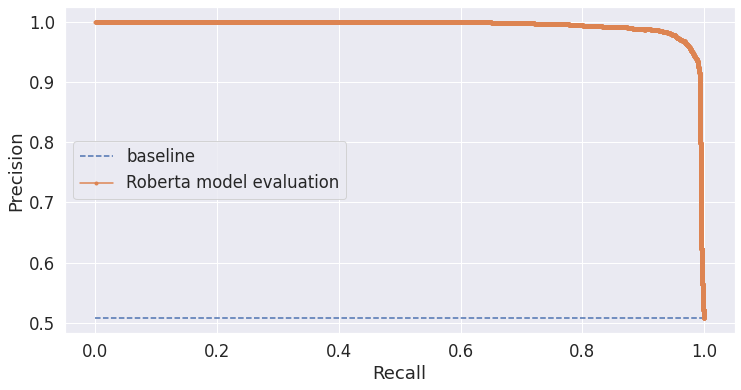

  Validation Loss: 0.22
  Validation took: 0:01:56

Training complete!
Total training took 0:45:04 (h:mm:ss)


In [ ]:
 #Roberta model
from sklearn.metrics import classification_report,confusion_matrix,f1_score,auc,precision_recall_curve,plot_precision_recall_curve,matthews_corrcoef
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
scaler = GradScaler()
criterion = torch.nn.BCEWithLogitsLoss()
# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
roberta_training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    roberta_model.train()

    # For each batch of training data...
    for step, batch in enumerate(roberta_train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(roberta_train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        roberta_model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        with autocast():
            loss, logits = roberta_model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
            b_labels1=torch.nn.functional.one_hot(b_labels, num_classes=2)
            #Calculating weights
            #positive=torch.sum(b_labels1, dim=0)
           # negative=len(b_labels1)-positive
            #negative
            #pos_weight  = positive / negative
            #criterion.pos_weight = pos_weight
            loss1 = loss_fn(logits,b_labels1).to(device)
           # print("loss:",loss1)
            loss1 = loss1 / 10

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss1.item()

        # Perform a backward pass to calculate the gradients.
        scaler.scale(loss1).backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
       # torch.nn.utils.clip_grad_norm_(model.parameters(),max_norm*scaler.get_scale())

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        if ((step + 1) % 10 == 0):
             scaler.step(roberta_optimizer)
       # Updates the scale for next iteration.
             scaler.update()
        # Update the learning rate.
             roberta_scheduler.step()       
             roberta_optimizer.zero_grad()
            # roberta_model.zero_grad()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(roberta_train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    roberta_model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_f1_score =0
    predlist =[]
    lbllist =[]
    total_logits =[]

    # Evaluate data for one epoch
    for batch in roberta_validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = roberta_model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            #Converting the labels to one hot to sync with same shape as logits
            b_labels1=torch.nn.functional.one_hot(b_labels, num_classes=2)
            loss1 = loss_fn(logits, b_labels1)
       # print("loss1:",loss1)
            
        # Accumulate the validation loss.
        total_eval_loss += loss1.item()

         #Converting for predictions by applying sigmoid to logits
        pred_logits_sigmoid=torch.sigmoid(logits)
        y_pred=torch.round(pred_logits_sigmoid)

        # Move logits and labels to CPU
        logits_pred = y_pred.detach().cpu().numpy()
        label_ids1 = b_labels.to('cpu').numpy()
        logits=logits.detach().cpu().numpy()
        #For confusion matrix and classification report to work we need same dimensions.
        label_ids = b_labels1.to('cpu').numpy()
        pred_logits_sigmoid = pred_logits_sigmoid.detach().cpu().numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids1)

         #print(predictions)
        predictions=np.argmax(logits_pred, axis=1)
        y_test=np.argmax(label_ids,axis=1)
        predlist.extend(predictions)
        lbllist.extend(y_test)
        #Accumulating the sigmoid positive logits for precision recall curve
        total_logits.extend(pred_logits_sigmoid[:,1])
        total_f1_score += f1_score(predictions,y_test, average = 'macro')
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(roberta_validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    #f1 score

    avg_f1_score =total_f1_score/len(roberta_validation_dataloader)
    print("  F1 score: {0:.2f}".format(avg_f1_score))

     #classification report
    print(classification_report(lbllist,predlist))  

    #confusion matrix
    cm = confusion_matrix(lbllist,predlist)
    # constant for classes
    print(cm)
    #mcc score
    print("Mathews Correlation coefficient score for this epoch is :",round(matthews_corrcoef(lbllist, predlist),2))
    #Precision recall curve plot
    lr_precision, lr_recall, thresholds = precision_recall_curve(lbllist,total_logits)
    lr_f1, lr_auc = f1_score( lbllist,predlist), auc(lr_recall, lr_precision)
    print('Model validation score: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    baseline = lbllist.count(1) / len(lbllist)
    plt.plot([0, 1], [baseline, baseline], linestyle='--', label='baseline')
    plt.plot(lr_recall, lr_precision, marker='.', label='Roberta model evaluation')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(roberta_validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    roberta_training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [ ]:

del roberta_model
del roberta_optimizer
torch.cuda.empty_cache()

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=roberta_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,3.60e-02,0.15,0.94,0:07:06,0:01:56
2,1.62e-02,0.24,0.91,0:07:05,0:01:56
3,1.20e-02,0.10,0.96,0:07:05,0:01:56
4,1.14e-02,0.16,0.94,0:07:04,0:01:56
5,9.21e-03,0.22,0.92,0:07:05,0:01:56


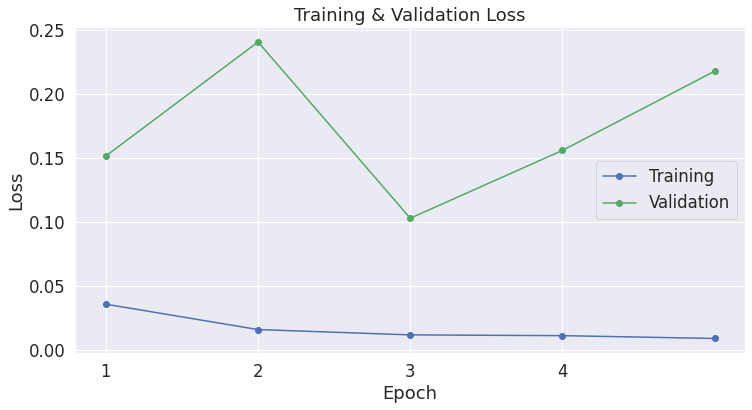

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
#XLNET
xlnet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", # 12-layer, 768-hidden, 12-heads, 125M parameters RoBERTa using the BERT-base architecture
                                                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                    # You can increase this for multi-class tasks.   
                                                                    output_attentions = False, # Whether the model returns attentions weights.
                                                                    output_hidden_states = False # Whether the model returns all hidden-states.
                                                                )
xlnet_tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
# Tell pytorch to run this model on the GPU.
xlnet_model.cuda()


print(' Base model s loaded')

- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 Base model s loaded


In [ ]:

# Print the text split into tokens.
print('Tokenized XLNET: ', xlnet_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs XLNET: ', xlnet_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(sentences[0])))

Tokenized XLNET:  ['▁love', '▁this', '▁', '!', '▁well', '▁made', '▁', ',', '▁sturdy', '▁', ',', '▁and', '▁very', '▁comfortable', '▁', '.', '▁', 'i', '▁love', '▁it', '▁', '!', '▁very', '▁pretty']
Token IDs XLNET:  [15479, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
sequence = """Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️"""
print("""Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️""")
xlnet_tokenized_sequence=xlnet_tokenizer.tokenize(sequence)
print("XLNET:",xlnet_tokenized_sequence)

Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️
XLNET: ['▁Will', '▁Your', '▁Home', 'town', '▁Be', '▁Taking', '▁In', '▁Obama', '’', 's', '▁Refugees', '?', '▁Here', '’', 's', '▁The', '▁List', '▁Of', '▁Cities', '▁Where', '▁They', '’', 're', '▁Being', '▁Trans', 'plant', 'ed', '▁', '🏙️']


In [ ]:
xlnet_tokenizer.pad_token,xlnet_tokenizer.pad_token_id

In [ ]:
token_lens = []

for txt in sentences:
    tokens = xlnet_tokenizer.encode(txt,truncation=True, max_length=512)
    token_lens.append(len(tokens))

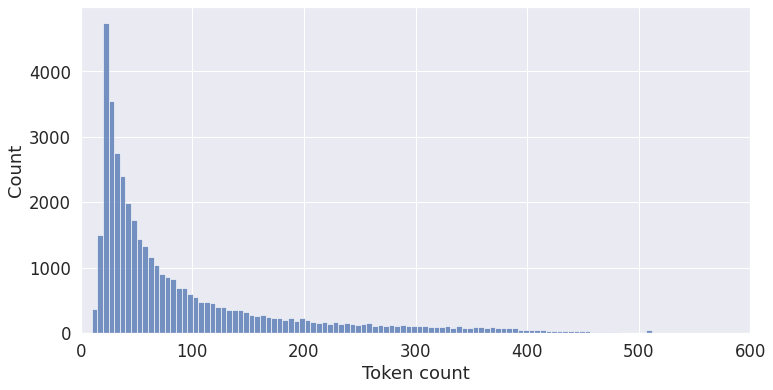

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(token_lens)
plt.xlim([0, 600]);
plt.xlabel('Token count');

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
xlnet_input_ids =[]
xlnet_attention_masks=[]
sentence_ids = []
counter = 0

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    xlnet_encoded_dict = xlnet_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt', 
                        truncation = True    # Return pytorch tensors.
                   )
    # Add the encoded sentence to the list.    
    xlnet_input_ids.append(xlnet_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    xlnet_attention_masks.append(xlnet_encoded_dict['attention_mask'])
    
    # collecting sentence_ids
    sentence_ids.append(counter)
    counter  = counter + 1
    
    
    
# Convert the lists into tensors.

xlnet_input_ids = torch.cat(xlnet_input_ids, dim=0)
xlnet_attention_masks = torch.cat(xlnet_attention_masks, dim=0)
labels = torch.tensor(df1.label.values)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[1])
print('Token IDs XLNET:', xlnet_input_ids[1])
print('labels:', labels)

Original:  love it , a great upgrade from the original . i ve had mine for a couple of years
Token IDs XLNET: tensor([   5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5,
          

In [ ]:
from torch.utils.data import TensorDataset, random_split
# function to seed the script globally
torch.manual_seed(1)
xlnet_dataset = TensorDataset(xlnet_input_ids, xlnet_attention_masks, labels)

In [ ]:
# Create a 80-20 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(xlnet_dataset))
val_size = len(xlnet_dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(xlnet_dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

32,345 training samples
8,087 validation samples


In [ ]:
len(train_dataset)

In [ ]:
import collections as c
train_classes = [df1.label[i] for i in train_dataset.indices]
c.Counter(train_classes)

Counter({0: 16177, 1: 16168})

In [ ]:

# Get all of the model's parameters as a list of tuples.
params = list(xlnet_model.named_parameters())

print('The Xlnet model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The Xlnet model has 210 different named parameters.

==== Embedding Layer ====

transformer.mask_emb                                     (1, 1, 768)
transformer.word_embedding.weight                       (32000, 768)
transformer.layer.0.rel_attn.q                          (768, 12, 64)
transformer.layer.0.rel_attn.k                          (768, 12, 64)
transformer.layer.0.rel_attn.v                          (768, 12, 64)

==== First Transformer ====

transformer.layer.0.rel_attn.o                          (768, 12, 64)
transformer.layer.0.rel_attn.r                          (768, 12, 64)
transformer.layer.0.rel_attn.r_r_bias                       (12, 64)
transformer.layer.0.rel_attn.r_s_bias                       (12, 64)
transformer.layer.0.rel_attn.r_w_bias                       (12, 64)
transformer.layer.0.rel_attn.seg_embed                   (2, 12, 64)
transformer.layer.0.rel_attn.layer_norm.weight                (768,)
transformer.layer.0.rel_attn.layer_norm.bias             

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in xlnet_model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in xlnet_model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5, eps = 1e-8)

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 5

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(xlnet_train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


======== Epoch 1 / 5 ========
Training...
  Batch    40  of  2,157.    Elapsed: 0:00:23.
  Batch    80  of  2,157.    Elapsed: 0:00:46.
  Batch   120  of  2,157.    Elapsed: 0:01:08.
  Batch   160  of  2,157.    Elapsed: 0:01:31.
  Batch   200  of  2,157.    Elapsed: 0:01:53.
  Batch   240  of  2,157.    Elapsed: 0:02:16.
  Batch   280  of  2,157.    Elapsed: 0:02:39.
  Batch   320  of  2,157.    Elapsed: 0:03:01.
  Batch   360  of  2,157.    Elapsed: 0:03:24.
  Batch   400  of  2,157.    Elapsed: 0:03:46.
  Batch   440  of  2,157.    Elapsed: 0:04:09.
  Batch   480  of  2,157.    Elapsed: 0:04:32.
  Batch   520  of  2,157.    Elapsed: 0:04:54.
  Batch   560  of  2,157.    Elapsed: 0:05:17.
  Batch   600  of  2,157.    Elapsed: 0:05:40.
  Batch   640  of  2,157.    Elapsed: 0:06:02.
  Batch   680  of  2,157.    Elapsed: 0:06:25.
  Batch   720  of  2,157.    Elapsed: 0:06:47.
  Batch   760  of  2,157.    Elapsed: 0:07:10.
  Batch   800  of  2,157.    Elapsed: 0:07:33.
  Batch   840  of

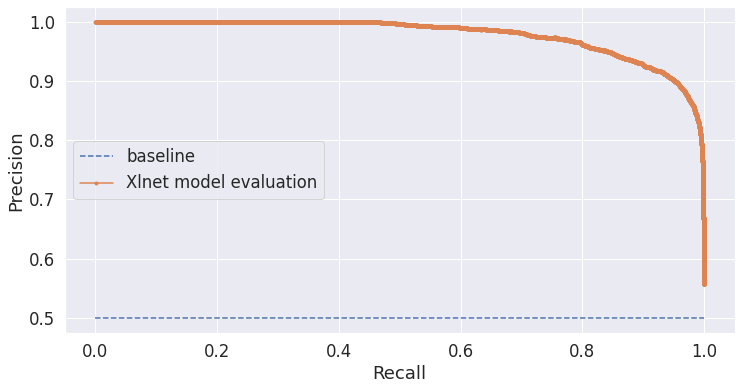

  Validation Loss: 0.38
  Validation took: 0:04:58

======== Epoch 2 / 5 ========
Training...
  Batch    40  of  2,157.    Elapsed: 0:00:23.
  Batch    80  of  2,157.    Elapsed: 0:00:45.
  Batch   120  of  2,157.    Elapsed: 0:01:08.
  Batch   160  of  2,157.    Elapsed: 0:01:31.
  Batch   200  of  2,157.    Elapsed: 0:01:53.
  Batch   240  of  2,157.    Elapsed: 0:02:16.
  Batch   280  of  2,157.    Elapsed: 0:02:38.
  Batch   320  of  2,157.    Elapsed: 0:03:01.
  Batch   360  of  2,157.    Elapsed: 0:03:23.
  Batch   400  of  2,157.    Elapsed: 0:03:46.
  Batch   440  of  2,157.    Elapsed: 0:04:09.
  Batch   480  of  2,157.    Elapsed: 0:04:31.
  Batch   520  of  2,157.    Elapsed: 0:04:54.
  Batch   560  of  2,157.    Elapsed: 0:05:16.
  Batch   600  of  2,157.    Elapsed: 0:05:39.
  Batch   640  of  2,157.    Elapsed: 0:06:01.
  Batch   680  of  2,157.    Elapsed: 0:06:24.
  Batch   720  of  2,157.    Elapsed: 0:06:47.
  Batch   760  of  2,157.    Elapsed: 0:07:09.
  Batch   800

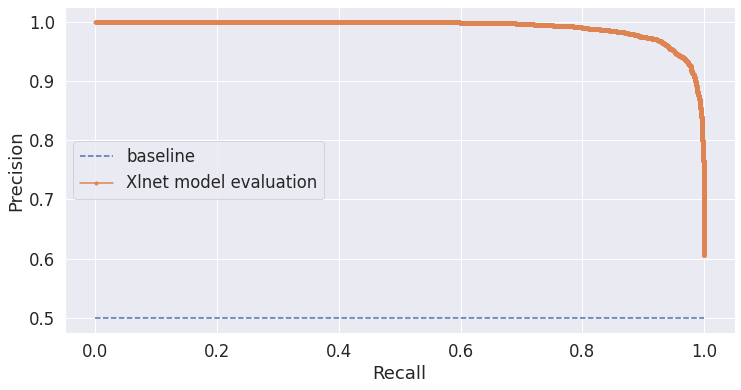

  Validation Loss: 0.13
  Validation took: 0:04:58

======== Epoch 3 / 5 ========
Training...
  Batch    40  of  2,157.    Elapsed: 0:00:23.
  Batch    80  of  2,157.    Elapsed: 0:00:45.
  Batch   120  of  2,157.    Elapsed: 0:01:08.
  Batch   160  of  2,157.    Elapsed: 0:01:31.
  Batch   200  of  2,157.    Elapsed: 0:01:53.
  Batch   240  of  2,157.    Elapsed: 0:02:16.
  Batch   280  of  2,157.    Elapsed: 0:02:38.
  Batch   320  of  2,157.    Elapsed: 0:03:01.
  Batch   360  of  2,157.    Elapsed: 0:03:23.
  Batch   400  of  2,157.    Elapsed: 0:03:46.
  Batch   440  of  2,157.    Elapsed: 0:04:09.
  Batch   480  of  2,157.    Elapsed: 0:04:31.
  Batch   520  of  2,157.    Elapsed: 0:04:54.
  Batch   560  of  2,157.    Elapsed: 0:05:16.
  Batch   600  of  2,157.    Elapsed: 0:05:39.
  Batch   640  of  2,157.    Elapsed: 0:06:01.
  Batch   680  of  2,157.    Elapsed: 0:06:24.
  Batch   720  of  2,157.    Elapsed: 0:06:47.
  Batch   760  of  2,157.    Elapsed: 0:07:09.
  Batch   800

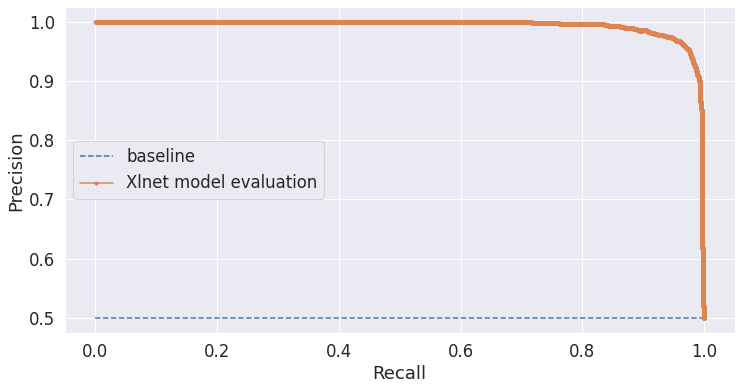

  Validation Loss: 0.12
  Validation took: 0:04:58

======== Epoch 4 / 5 ========
Training...
  Batch    40  of  2,157.    Elapsed: 0:00:23.
  Batch    80  of  2,157.    Elapsed: 0:00:45.
  Batch   120  of  2,157.    Elapsed: 0:01:08.
  Batch   160  of  2,157.    Elapsed: 0:01:31.
  Batch   200  of  2,157.    Elapsed: 0:01:53.
  Batch   240  of  2,157.    Elapsed: 0:02:16.
  Batch   280  of  2,157.    Elapsed: 0:02:38.
  Batch   320  of  2,157.    Elapsed: 0:03:01.
  Batch   360  of  2,157.    Elapsed: 0:03:23.
  Batch   400  of  2,157.    Elapsed: 0:03:46.
  Batch   440  of  2,157.    Elapsed: 0:04:09.
  Batch   480  of  2,157.    Elapsed: 0:04:31.
  Batch   520  of  2,157.    Elapsed: 0:04:54.
  Batch   560  of  2,157.    Elapsed: 0:05:16.
  Batch   600  of  2,157.    Elapsed: 0:05:39.
  Batch   640  of  2,157.    Elapsed: 0:06:01.
  Batch   680  of  2,157.    Elapsed: 0:06:24.
  Batch   720  of  2,157.    Elapsed: 0:06:47.
  Batch   760  of  2,157.    Elapsed: 0:07:09.
  Batch   800

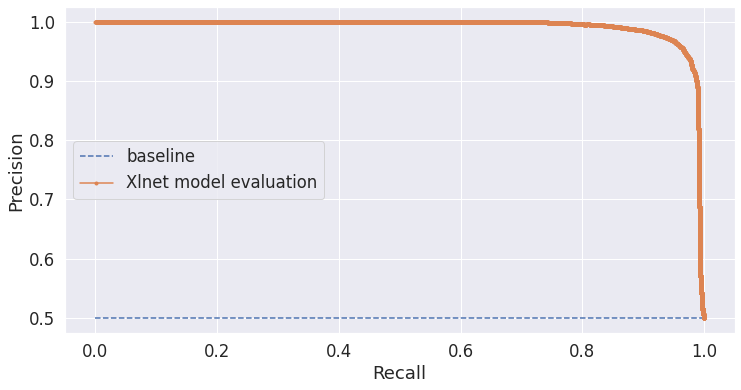

  Validation Loss: 0.30
  Validation took: 0:04:58

======== Epoch 5 / 5 ========
Training...
  Batch    40  of  2,157.    Elapsed: 0:00:23.
  Batch    80  of  2,157.    Elapsed: 0:00:45.
  Batch   120  of  2,157.    Elapsed: 0:01:08.
  Batch   160  of  2,157.    Elapsed: 0:01:31.
  Batch   200  of  2,157.    Elapsed: 0:01:53.
  Batch   240  of  2,157.    Elapsed: 0:02:16.
  Batch   280  of  2,157.    Elapsed: 0:02:38.
  Batch   320  of  2,157.    Elapsed: 0:03:01.
  Batch   360  of  2,157.    Elapsed: 0:03:23.
  Batch   400  of  2,157.    Elapsed: 0:03:46.
  Batch   440  of  2,157.    Elapsed: 0:04:09.
  Batch   480  of  2,157.    Elapsed: 0:04:31.
  Batch   520  of  2,157.    Elapsed: 0:04:54.
  Batch   560  of  2,157.    Elapsed: 0:05:16.
  Batch   600  of  2,157.    Elapsed: 0:05:39.
  Batch   640  of  2,157.    Elapsed: 0:06:02.
  Batch   680  of  2,157.    Elapsed: 0:06:24.
  Batch   720  of  2,157.    Elapsed: 0:06:47.
  Batch   760  of  2,157.    Elapsed: 0:07:09.
  Batch   800

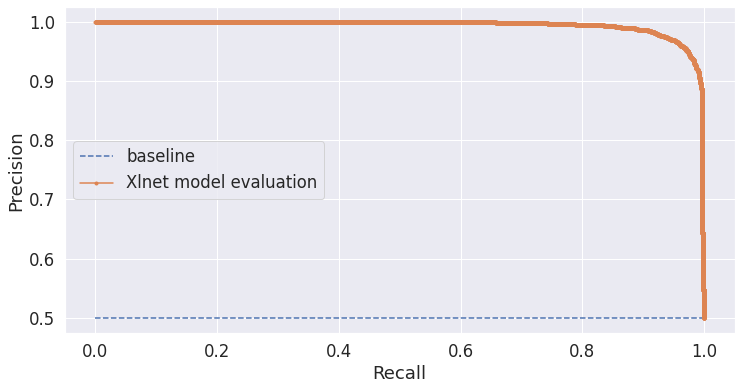

  Validation Loss: 0.17
  Validation took: 0:04:58

Training complete!
Total training took 2:06:16 (h:mm:ss)


In [ ]:
from sklearn.metrics import classification_report,auc,confusion_matrix,f1_score,precision_recall_curve,plot_precision_recall_curve,matthews_corrcoef
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
scaler = GradScaler()
criterion = torch.nn.BCEWithLogitsLoss()
# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
xlnet_training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    xlnet_model.train()

    # For each batch of training data...
    for step, batch in enumerate(xlnet_train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(xlnet_train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        xlnet_model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        with autocast():
            loss, logits = xlnet_model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
            b_labels1=torch.nn.functional.one_hot(b_labels, num_classes=2)
            #Calculating weights
            #positive=torch.sum(b_labels1, dim=0)
           # negative=len(b_labels1)-positive
            #negative
            #pos_weight  = positive / negative
            #criterion.pos_weight = pos_weight
            loss1 = loss_fn(logits,b_labels1).to(device)
           # print("loss:",loss1)
            loss1 = loss1 / 10

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss1.item()

        # Perform a backward pass to calculate the gradients.
        scaler.scale(loss1).backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
       # torch.nn.utils.clip_grad_norm_(model.parameters(),max_norm*scaler.get_scale())

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        if ((step + 1) % 10 == 0):
             scaler.step(optimizer)
       # Updates the scale for next iteration.
             scaler.update()
        # Update the learning rate.
             scheduler.step()       
             optimizer.zero_grad()
            # xlnet_model.zero_grad()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(xlnet_train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    xlnet_model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_f1_score =0
    predlist =[]
    lbllist =[]
    total_logits=[]

    # Evaluate data for one epoch
    for batch in xlnet_validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = xlnet_model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            #Converting the labels to one hot to sync with same shape as logits
            b_labels1=torch.nn.functional.one_hot(b_labels, num_classes=2)
            loss1 = loss_fn(logits, b_labels1)
       # print("loss1:",loss1)
            
        # Accumulate the validation loss.
        total_eval_loss += loss1.item()

         #Converting for predictions by applying sigmoid to logits
        pred_logits_sigmoid=torch.sigmoid(logits)
        y_pred=torch.round(pred_logits_sigmoid)
        
        # Move logits and labels to CPU
        logits_pred = y_pred.detach().cpu().numpy()
        label_ids1 = b_labels.to('cpu').numpy()
        logits=logits.detach().cpu().numpy()
        #For confusion matrix and classification report to work we need same dimensions.
        label_ids = b_labels1.to('cpu').numpy()
        pred_logits_sigmoid=pred_logits_sigmoid.detach().cpu().numpy()
     
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids1)

         #print(predictions)
       # predictions=np.argmax(logits_pred, axis=1)
        predictions =np.argmax(logits_pred,axis=1)
        y_test=np.argmax(label_ids,axis=1)
        predlist.extend(predictions)
        lbllist.extend(y_test)
        #Accumulating the sigmoid positive logits for precision recall curve
        total_logits.extend(pred_logits_sigmoid[:,1])
        #total_logits.extend(pred_logits_sigmoid)
        total_f1_score += f1_score(predlist,lbllist, average = 'macro')
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(xlnet_validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    #f1 score

    avg_f1_score =total_f1_score/len(xlnet_validation_dataloader)
    print("  F1 score: {0:.2f}".format(avg_f1_score))

     #classification report
    print(classification_report(lbllist, predlist))  

    #confusion matrix
    cm = confusion_matrix(lbllist,predlist)
    # constant for classes
    print(cm)
    #mcc score
    print("Mathews Correlation coefficient score for this epoch is :",round(matthews_corrcoef(lbllist, predlist),2))
    #Precision recall curve plot
    lr_precision, lr_recall, thresholds = precision_recall_curve(lbllist,total_logits)
    lr_f1, lr_auc = f1_score( lbllist,predlist), auc(lr_recall, lr_precision)
    print('Model validation score: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    baseline = lbllist.count(1) / len(lbllist)
    plt.plot([0, 1], [baseline, baseline], linestyle='--', label='baseline')
    plt.plot(lr_recall, lr_precision, marker='.', label='Xlnet model evaluation')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(xlnet_validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    xlnet_training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=xlnet_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.03,0.38,0.85,0:20:18,0:04:58
2,0.02,0.13,0.95,0:20:17,0:04:58
3,0.01,0.12,0.96,0:20:17,0:04:58
4,0.01,0.30,0.92,0:20:17,0:04:58
5,0.01,0.17,0.94,0:20:17,0:04:58


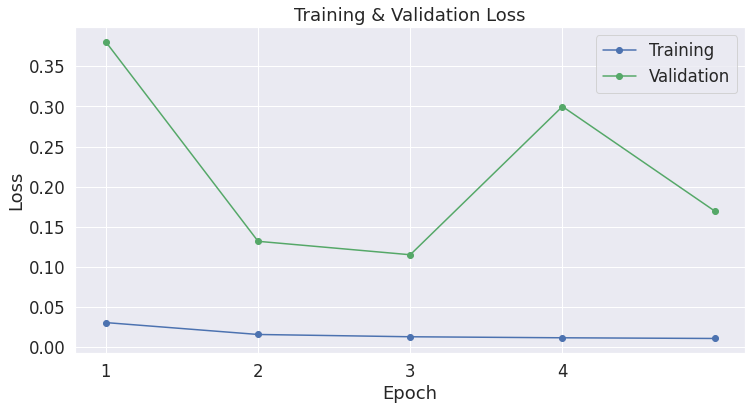

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
! python --version

Python 3.7.14
